<IPython.core.display.Javascript object>


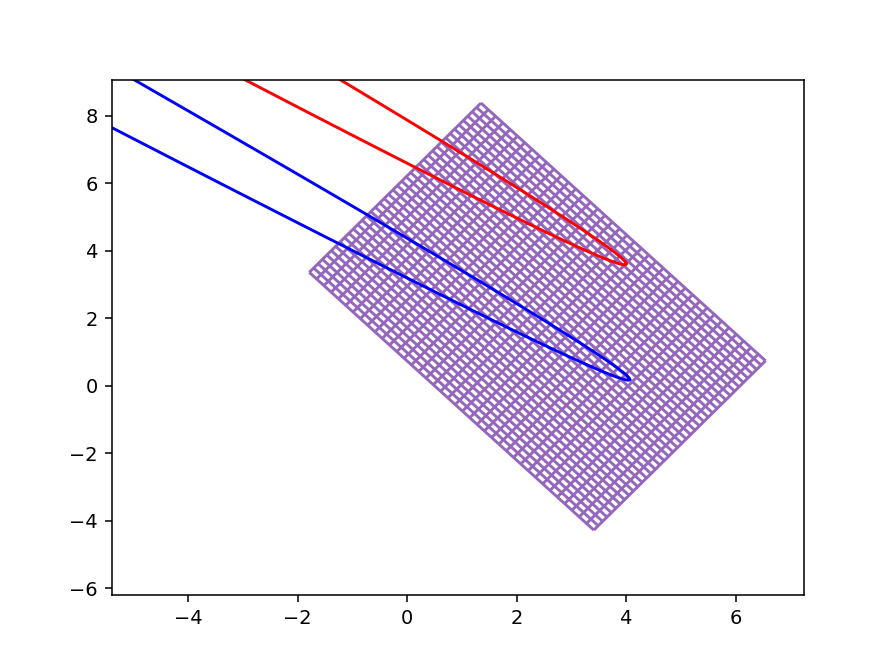

In [61]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from numpy import pi
import math
from matplotlib.collections import LineCollection
x = np.arange(-3,3,0.1)
y1 = 2*x**2  + 0.5
y2 = 2*x**2  -3
fig,ax = plt.subplots()
grid_x,grid_y = np.meshgrid(np.linspace(-5,5,40),np.linspace(-5,5,40))
ln1, = ax.plot([], [], 'r-')
ln2, = ax.plot([], [], 'b-')
n_iter = 20
scale_factor = 2
def init():
	return ln1,ln2
def transform_maker(rotation,scale_x,scale_y,translate,shear,n_iter=n_iter):
    lists = []
    n_iter = 20
    rotation /= n_iter
    scale_x = scale_x ** (1/n_iter)
    scale_y = scale_y ** (1/n_iter)
    translate[0] /=  n_iter
    translate[1] /= n_iter
    shear[0] /= n_iter
    shear[1] /= n_iter
    rot_matrix = np.matrix([[np.cos(rotation),np.sin(rotation),translate[0]],
                        [-(np.sin(rotation)),np.cos(rotation),translate[1]],
                       [0,0,1]])
    scale_matrix = np.matrix([[scale_x,np.tan(shear[0]),0],
                              [np.tan(shear[1]),scale_y,0],
                              [0,0,1]])
    matrix = rot_matrix*scale_matrix
    for i in range(n_iter):
        lists.append(matrix)
    return lists
def plot_grid(x,y, ax=None, **kwargs):
    ax = ax or plt.gca()
    segs1 = np.stack((x,y), axis=2)
    segs2 = segs1.transpose(1,0,2)
    ax.collections = []
    vertical_lines=LineCollection(segs1, **kwargs)
    horizontal_lines=LineCollection(segs2, **kwargs)
    ax.add_collection(vertical_lines)
    ax.add_collection(horizontal_lines)
    ax.autoscale_view()
    return vertical_lines, horizontal_lines

def update(frame,*args):
	global grid_x,grid_y,x,y1,y2
	ax = args[0]
	mat1 = distortion(x,y1,frame)
	x,y1 = mat1[0],mat1[1]
	mat2 = distortion(x,y2,frame)
	x,y2 = mat2[0],mat2[1]
	mat_grid = distortion(grid_x, grid_y,matrices_set[0])
	grid_x,grid_y = mat_grid[0], mat_grid[1]
	vert,hor=plot_grid(mat_grid[0], mat_grid[1], ax=ax, color="C4")
	ln1.set_data(mat1[0],mat1[1])
	ln2.set_data(mat2[0],mat2[1])
	return ln1,ln2#,vert,hor
def update_tanh(frame,*args):
	global grid_x,grid_y,x,y1,y2
	ax= args[0]
	tanh_x,tanh_y1,tanh_y2,tanh_grid_x,tanh_grid_y = frame[0:5]
	grid_x,grid_y = grid_x*tanh_grid_x,grid_y*tanh_grid_y
	x,y1,y2 = x*tanh_x,y1*tanh_y1,y2*tanh_y2
	vert,hor=plot_grid(grid_x,grid_y, ax=ax, color="C4")
	ln1.set_data(x,y1)
	ln2.set_data(x,y2)
	return ln1,ln2,vert,hor
def distortion(x,y,matrix):
    s = np.stack(arrays=(x,y,np.ones(shape=x.shape)),axis = 0)
    s = np.tensordot(matrix,s,axes=(1,0))
    return s[0:2]
matrices_set = transform_maker(rotation=-pi/4,
                               scale_x = 0.5,scale_y =1,
                               translate = [4,1],shear=[0,0]) 
# try changing the parameters here
#first block won't show any figure, because we haven't drawn anything

In [62]:
ani = FuncAnimation(fig, update, 
                    frames=matrices_set,
                    init_func=init,fargs=[ax], blit=True,repeat=False)
plt.show()

In [60]:
tanh_x = (scale_factor*np.tanh(x)/x) ** (1/n_iter)
tanh_y1 = (scale_factor*np.tanh(y1)/y1) ** (1/n_iter)
tanh_y2 = (scale_factor*np.tanh(y2)/y2) ** (1/n_iter)
tanh_grid_x = (scale_factor*np.tanh(grid_x)/grid_x) **(1/n_iter)
tanh_grid_y = (scale_factor*np.tanh(grid_y)/grid_y) **(1/n_iter)
ani2 = FuncAnimation(fig, update_tanh,
					frames=[(tanh_x,tanh_y1,tanh_y2,tanh_grid_x,tanh_grid_y) for i in range(n_iter)],
					init_func=init,fargs=[ax], blit=True,repeat=False)
plt.show()